#### Análise exploratória vinculos Jovens

In [1]:
#instalação dos componetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #biblioteca utilizada para construção de gráficos
import seaborn as sns #biblioteca utilizada para o plot dos gráficos de forma mais "bonita"


In [2]:
# ## Seleção de colunas para importação. 
cols_name = ['ano', 'uf', 'municipio', 'raca_cor', 'sexo_trabalhador', 'idade', 'faixa_etaria',
       'escolaridade_apos_2005', 'cnae_20_classe', 'tipo_vinculo', 'tamanho_estabelecimento', 'vl_remun_media_nom',
       'cnae_20_divisao', 'cnae_20_grupo'
]

### Análise dados RAIS - Jovens - Pré-processamento III

In [3]:
# importando dados rais
df_vinculos = pd.read_csv('dados_rais/dados_rais_jovens.csv', sep =',', encoding='utf-8', usecols = cols_name
                               )

In [4]:
## Reorganizado posição das colunas. 
df_vinculos = df_vinculos[[
    'ano', 
    'uf', 
    'municipio', 
    'raca_cor', 
    'sexo_trabalhador', 
    'idade',
    'faixa_etaria',
    'escolaridade_apos_2005',
    'vl_remun_media_nom',
    'tipo_vinculo', 
    'tamanho_estabelecimento', 
    'cnae_20_classe',
    'cnae_20_divisao', 
    'cnae_20_grupo'        
]]

Faixa etária | COD
----|-----	
10 A 14 anos|01
15 A 17 anos|02
18 A 24 anos|03
25 A 29 anos|04
30 A 39 anos|05
40 A 49 anos|06
50 A 64 anos|07
65 anos ou mais|08
{ñ class}|	{ñ class}


\\\\\\

Grau de instruçaoescolaridade | COD
----|-----
ANALFABETO  | 1
ATE 5 A INC | 2
5 A CO FUND | 3
6 A 9 FUND  | 4
FUND COMPL  | 5
MEDIO INCOMP| 6
MEDIO COMPL | 7
SUP INCOMP  | 8
SUP COMP    | 9
MESTRADO    | 10
DOUTORADO   | 11
IGNORADO    | -1

\\\

Raça cor | COD
----|-----
INDIGENA|1
BRANCA  |2
PRETA	|4
AMARELA	|6
PARDA	|8
NAO IDENT|9
IGNORADO|-1




In [5]:
# binarizando a features 
df_vinculos_bin = pd.get_dummies(df_vinculos, columns = ['raca_cor', 'sexo_trabalhador', 'escolaridade_apos_2005', 'faixa_etaria', 'tipo_vinculo', 'tamanho_estabelecimento'], dtype=int)
# visualizando o resultado
df_vinculos_bin.head(5)
#df2.head(5)

,ano,uf,municipio,idade,vl_remun_media_nom,cnae_20_classe,cnae_20_divisao,cnae_20_grupo,raca_cor_1,raca_cor_2,...,tipo_vinculo_97,tamanho_estabelecimento_2,tamanho_estabelecimento_3,tamanho_estabelecimento_4,tamanho_estabelecimento_5,tamanho_estabelecimento_6,tamanho_estabelecimento_7,tamanho_estabelecimento_8,tamanho_estabelecimento_9,tamanho_estabelecimento_10
0,2018,50,500270,22,1344.96,10694,10,106,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2018,50,500370,25,1223.16,22234,22,222,1,0,...,0,0,1,0,0,0,0,0,0,0
2,2018,50,500240,22,314.82,94201,94,942,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2018,50,500240,25,2041.33,94201,94,942,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2018,50,500370,27,1352.95,23117,23,231,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#encontrando as colunas
df_vinculos_bin.columns

Index(['ano', 'uf', 'municipio', 'idade', 'vl_remun_media_nom',
       'cnae_20_classe', 'cnae_20_divisao', 'cnae_20_grupo', 'raca_cor_1',
       'raca_cor_2', 'raca_cor_4', 'raca_cor_6', 'raca_cor_8', 'raca_cor_9',
       'raca_cor_99', 'sexo_trabalhador_1', 'sexo_trabalhador_2',
       'sexo_trabalhador_9', 'escolaridade_apos_2005_1',
       'escolaridade_apos_2005_2', 'escolaridade_apos_2005_3',
       'escolaridade_apos_2005_4', 'escolaridade_apos_2005_5',
       'escolaridade_apos_2005_6', 'escolaridade_apos_2005_7',
       'escolaridade_apos_2005_8', 'escolaridade_apos_2005_9',
       'escolaridade_apos_2005_10', 'escolaridade_apos_2005_11',
       'escolaridade_apos_2005_99', 'faixa_etaria_2', 'faixa_etaria_3',
       'faixa_etaria_4', 'tipo_vinculo_10', 'tipo_vinculo_15',
       'tipo_vinculo_20', 'tipo_vinculo_25', 'tipo_vinculo_30',
       'tipo_vinculo_31', 'tipo_vinculo_35', 'tipo_vinculo_40',
       'tipo_vinculo_50', 'tipo_vinculo_55', 'tipo_vinculo_60',
       'tipo_vinc

In [ ]:
## Excluir colunas
#columns_drop = ['idade', 'escolaridade_apos_2005']
#df_vinculos = df_vinculos.drop(columns_drop, axis=1)

#### Ajuste colunas município e cnae

In [7]:
df_vinculos_uf = df_vinculos.groupby(['ano', 'uf'])['cnae_20_divisao'].size().reset_index(name='qt_vc_uf')

In [8]:
df_vinculos_uf.head(5)

,ano,uf,qt_vc_uf
0,2018,11,104069
1,2018,12,32008
2,2018,13,149575
3,2018,14,25518
4,2018,15,267442


In [9]:
df_vinculos_divisao_uf = df_vinculos.groupby(['ano', 'uf', 'cnae_20_divisao'])['cnae_20_divisao'].size().reset_index(name='qt_vc_divisao_uf')

In [10]:
df_vinculos_divisao_uf.head(5)

,ano,uf,cnae_20_divisao,qt_vc_divisao_uf
0,2018,11,1,4103
1,2018,11,2,128
2,2018,11,3,82
3,2018,11,7,184
4,2018,11,8,148


In [11]:
df_vinculos_munic = df_vinculos.groupby(['ano', 'uf', 'municipio'])['cnae_20_divisao'].size().reset_index(name='qt_vc_munic')

In [12]:
df_vinculos_munic.head(5)

,ano,uf,municipio,qt_vc_munic
0,2018,11,110001,1007
1,2018,11,110002,6955
2,2018,11,110003,205
3,2018,11,110004,7012
4,2018,11,110005,869


In [13]:
df_vinculos_divisao_munic = df_vinculos.groupby(['ano', 'uf', 'municipio', 'cnae_20_divisao'])['cnae_20_divisao'].size().reset_index(name='qt_vc_divisao_munic')

In [14]:
df_vinculos_divisao_munic.head(5)

,ano,uf,municipio,cnae_20_divisao,qt_vc_divisao_munic
0,2018,11,110001,1,105
1,2018,11,110001,10,58
2,2018,11,110001,14,1
3,2018,11,110001,16,22
4,2018,11,110001,18,1


In [15]:
df_vinculos_munic_uf = pd.merge(df_vinculos_divisao_munic, df_vinculos_uf, how='left', left_on=['ano', 'uf'],
                     right_on=['ano', 'uf'])

In [16]:
df_vinculos_munic_uf.head(5)

,ano,uf,municipio,cnae_20_divisao,qt_vc_divisao_munic,qt_vc_uf
0,2018,11,110001,1,105,104069
1,2018,11,110001,10,58,104069
2,2018,11,110001,14,1,104069
3,2018,11,110001,16,22,104069
4,2018,11,110001,18,1,104069


In [17]:
df_vinculos_munic_uf_total = pd.merge(df_vinculos_munic_uf, df_vinculos_munic, how='left', left_on=['ano', 'uf', 'municipio'],
                     right_on=['ano', 'uf', 'municipio'])

In [18]:
df_vinculos_munic_uf_total.head(5)

,ano,uf,municipio,cnae_20_divisao,qt_vc_divisao_munic,qt_vc_uf,qt_vc_munic
0,2018,11,110001,1,105,104069,1007
1,2018,11,110001,10,58,104069,1007
2,2018,11,110001,14,1,104069,1007
3,2018,11,110001,16,22,104069,1007
4,2018,11,110001,18,1,104069,1007


In [19]:
df_vinculos_ql = pd.merge(df_vinculos_munic_uf_total, df_vinculos_divisao_uf, how='left', left_on=['ano', 'uf', 'cnae_20_divisao'],
                     right_on=['ano', 'uf', 'cnae_20_divisao'])

In [20]:
df_vinculos_ql.head(5)

,ano,uf,municipio,cnae_20_divisao,qt_vc_divisao_munic,qt_vc_uf,qt_vc_munic,qt_vc_divisao_uf
0,2018,11,110001,1,105,104069,1007,4103
1,2018,11,110001,10,58,104069,1007,8733
2,2018,11,110001,14,1,104069,1007,325
3,2018,11,110001,16,22,104069,1007,1396
4,2018,11,110001,18,1,104069,1007,241


### Cálculo QL

In [21]:
# Primeiro, definimos a função de cálculo do QL
def calcular_ql(qt_vc_divisao_munic, qt_vc_munic, qt_vc_divisao_uf, qt_vc_uf):
    ql = (qt_vc_divisao_munic / qt_vc_munic) / (qt_vc_divisao_uf / qt_vc_uf)
    return ql

In [22]:
# Agora, aplicamos a função a cada linha do DataFrame usando o método 'apply' junto com uma função lambda
df_vinculos_ql['quociente_locacional'] = df_vinculos_ql.apply(
    lambda row: calcular_ql(
        row['qt_vc_divisao_munic'],
        row['qt_vc_munic'],
        row['qt_vc_divisao_uf'],
        row['qt_vc_uf']
    ), axis=1
)

In [23]:
# formatação do print do numpy
np.set_printoptions(precision=4, suppress=True) # supppress - suprimir a notação científica.

In [24]:
df_vinculos_ql.head(5)

,ano,uf,municipio,cnae_20_divisao,qt_vc_divisao_munic,qt_vc_uf,qt_vc_munic,qt_vc_divisao_uf,quociente_locacional
0,2018,11,110001,1,105,104069,1007,4103,2.644720
1,2018,11,110001,10,58,104069,1007,8733,0.686367
2,2018,11,110001,14,1,104069,1007,325,0.317986
3,2018,11,110001,16,22,104069,1007,1396,1.628655
4,2018,11,110001,18,1,104069,1007,241,0.428820


In [25]:
df_vinculos_bin.columns

Index(['ano', 'uf', 'municipio', 'idade', 'vl_remun_media_nom',
       'cnae_20_classe', 'cnae_20_divisao', 'cnae_20_grupo', 'raca_cor_1',
       'raca_cor_2', 'raca_cor_4', 'raca_cor_6', 'raca_cor_8', 'raca_cor_9',
       'raca_cor_99', 'sexo_trabalhador_1', 'sexo_trabalhador_2',
       'sexo_trabalhador_9', 'escolaridade_apos_2005_1',
       'escolaridade_apos_2005_2', 'escolaridade_apos_2005_3',
       'escolaridade_apos_2005_4', 'escolaridade_apos_2005_5',
       'escolaridade_apos_2005_6', 'escolaridade_apos_2005_7',
       'escolaridade_apos_2005_8', 'escolaridade_apos_2005_9',
       'escolaridade_apos_2005_10', 'escolaridade_apos_2005_11',
       'escolaridade_apos_2005_99', 'faixa_etaria_2', 'faixa_etaria_3',
       'faixa_etaria_4', 'tipo_vinculo_10', 'tipo_vinculo_15',
       'tipo_vinculo_20', 'tipo_vinculo_25', 'tipo_vinculo_30',
       'tipo_vinculo_31', 'tipo_vinculo_35', 'tipo_vinculo_40',
       'tipo_vinculo_50', 'tipo_vinculo_55', 'tipo_vinculo_60',
       'tipo_vinc

In [26]:
# Agrupa por 'uf' e 'município' e conta os valores não nulos nas outras quatro colunas
df_vinculos_agg = df_vinculos_bin.groupby(['ano', 'uf', 'municipio', 'cnae_20_divisao']).agg({
'raca_cor_1': 'sum',
'raca_cor_2': 'sum',
'raca_cor_4': 'sum',
'raca_cor_6': 'sum', 
'raca_cor_8': 'sum',
'raca_cor_9': 'sum',
'raca_cor_99': 'sum',
'sexo_trabalhador_1': 'sum', 
'sexo_trabalhador_2': 'sum',
'sexo_trabalhador_9': 'sum',
'escolaridade_apos_2005_1': 'sum', 
'escolaridade_apos_2005_2': 'sum',
'escolaridade_apos_2005_3': 'sum', 
'escolaridade_apos_2005_4': 'sum',
'escolaridade_apos_2005_5': 'sum', 
'escolaridade_apos_2005_6': 'sum',
'escolaridade_apos_2005_7': 'sum', 
'escolaridade_apos_2005_8': 'sum',
'escolaridade_apos_2005_9': 'sum', 
'escolaridade_apos_2005_10': 'sum',
'escolaridade_apos_2005_11': 'sum', 
'escolaridade_apos_2005_99': 'sum',
'vl_remun_media_nom': 'mean',
'faixa_etaria_2': 'sum', 
'faixa_etaria_3': 'sum',
'faixa_etaria_4': 'sum',
'tipo_vinculo_10': 'sum', 'tipo_vinculo_15': 'sum',
'tipo_vinculo_20': 'sum', 'tipo_vinculo_25': 'sum', 'tipo_vinculo_30': 'sum',
'tipo_vinculo_31': 'sum', 'tipo_vinculo_35': 'sum', 'tipo_vinculo_40': 'sum',
'tipo_vinculo_50': 'sum', 'tipo_vinculo_55': 'sum', 'tipo_vinculo_60': 'sum',
'tipo_vinculo_65': 'sum', 'tipo_vinculo_70': 'sum', 'tipo_vinculo_75': 'sum',
'tipo_vinculo_80': 'sum', 'tipo_vinculo_90': 'sum', 'tipo_vinculo_95': 'sum',
'tipo_vinculo_96': 'sum', 'tipo_vinculo_97': 'sum', 'tamanho_estabelecimento_2': 'sum',
'tamanho_estabelecimento_3': 'sum', 'tamanho_estabelecimento_4': 'sum',
'tamanho_estabelecimento_5': 'sum', 'tamanho_estabelecimento_6': 'sum',
'tamanho_estabelecimento_7': 'sum', 'tamanho_estabelecimento_8': 'sum',
'tamanho_estabelecimento_9': 'sum', 'tamanho_estabelecimento_10': 'sum'
}).reset_index()

# Mostra o resultado
df_vinculos_agg.head()

,ano,uf,municipio,cnae_20_divisao,raca_cor_1,raca_cor_2,raca_cor_4,raca_cor_6,raca_cor_8,raca_cor_9,...,tipo_vinculo_97,tamanho_estabelecimento_2,tamanho_estabelecimento_3,tamanho_estabelecimento_4,tamanho_estabelecimento_5,tamanho_estabelecimento_6,tamanho_estabelecimento_7,tamanho_estabelecimento_8,tamanho_estabelecimento_9,tamanho_estabelecimento_10
0,2018,11,110001,1,0,23,0,0,63,19,...,0,64,12,18,11,0,0,0,0,0
1,2018,11,110001,10,0,3,1,0,50,4,...,0,6,4,0,0,48,0,0,0,0
2,2018,11,110001,14,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,2018,11,110001,16,0,1,1,0,15,5,...,0,2,1,0,19,0,0,0,0,0
4,2018,11,110001,18,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [27]:
df_vinculos_final = pd.merge(df_vinculos_agg, df_vinculos_ql, how='left', left_on=['ano', 'uf', 'municipio', 'cnae_20_divisao'],
                     right_on=['ano', 'uf', 'municipio', 'cnae_20_divisao'])

In [28]:
df_vinculos_final.head(5)

,ano,uf,municipio,cnae_20_divisao,raca_cor_1,raca_cor_2,raca_cor_4,raca_cor_6,raca_cor_8,raca_cor_9,...,tamanho_estabelecimento_6,tamanho_estabelecimento_7,tamanho_estabelecimento_8,tamanho_estabelecimento_9,tamanho_estabelecimento_10,qt_vc_divisao_munic,qt_vc_uf,qt_vc_munic,qt_vc_divisao_uf,quociente_locacional
0,2018,11,110001,1,0,23,0,0,63,19,...,0,0,0,0,0,105,104069,1007,4103,2.644720
1,2018,11,110001,10,0,3,1,0,50,4,...,48,0,0,0,0,58,104069,1007,8733,0.686367
2,2018,11,110001,14,0,0,0,0,1,0,...,0,0,0,0,0,1,104069,1007,325,0.317986
3,2018,11,110001,16,0,1,1,0,15,5,...,0,0,0,0,0,22,104069,1007,1396,1.628655
4,2018,11,110001,18,0,1,0,0,0,0,...,0,0,0,0,0,1,104069,1007,241,0.428820


Análise Geral: 
QL ≤ 0,49 localização fraca = 0
QL 0,50 ≤ 0,99 localização média = 1 
QL ≥ 1 localização significativa = 2

In [29]:
# Classificação do QL dos vínculos por setor no municípío

def classificar_ql(valor):
    if valor <= 0.49:
        return 0
    elif 0.50 <= valor <= 0.99:
        return 1
    else: 
        return 2

# Suponha que 'df' é o seu DataFrame e 'QL' é a coluna com os valores a serem classificados
df_vinculos_final['classificacao_ql'] = df_vinculos_final['quociente_locacional'].apply(classificar_ql)


In [30]:
df_vinculos_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663677 entries, 0 to 663676
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ano                         663677 non-null  int64  
 1   uf                          663677 non-null  int64  
 2   municipio                   663677 non-null  int64  
 3   cnae_20_divisao             663677 non-null  int64  
 4   raca_cor_1                  663677 non-null  int32  
 5   raca_cor_2                  663677 non-null  int32  
 6   raca_cor_4                  663677 non-null  int32  
 7   raca_cor_6                  663677 non-null  int32  
 8   raca_cor_8                  663677 non-null  int32  
 9   raca_cor_9                  663677 non-null  int32  
 10  raca_cor_99                 663677 non-null  int32  
 11  sexo_trabalhador_1          663677 non-null  int32  
 12  sexo_trabalhador_2          663677 non-null  int32  
 13  sexo_trabalhad

In [31]:
df_vinculos_final.columns

Index(['ano', 'uf', 'municipio', 'cnae_20_divisao', 'raca_cor_1', 'raca_cor_2',
       'raca_cor_4', 'raca_cor_6', 'raca_cor_8', 'raca_cor_9', 'raca_cor_99',
       'sexo_trabalhador_1', 'sexo_trabalhador_2', 'sexo_trabalhador_9',
       'escolaridade_apos_2005_1', 'escolaridade_apos_2005_2',
       'escolaridade_apos_2005_3', 'escolaridade_apos_2005_4',
       'escolaridade_apos_2005_5', 'escolaridade_apos_2005_6',
       'escolaridade_apos_2005_7', 'escolaridade_apos_2005_8',
       'escolaridade_apos_2005_9', 'escolaridade_apos_2005_10',
       'escolaridade_apos_2005_11', 'escolaridade_apos_2005_99',
       'vl_remun_media_nom', 'faixa_etaria_2', 'faixa_etaria_3',
       'faixa_etaria_4', 'tipo_vinculo_10', 'tipo_vinculo_15',
       'tipo_vinculo_20', 'tipo_vinculo_25', 'tipo_vinculo_30',
       'tipo_vinculo_31', 'tipo_vinculo_35', 'tipo_vinculo_40',
       'tipo_vinculo_50', 'tipo_vinculo_55', 'tipo_vinculo_60',
       'tipo_vinculo_65', 'tipo_vinculo_70', 'tipo_vinculo_75',
    

In [32]:
df_columns = ['ano', 'uf', 'municipio', 'cnae_20_divisao', 'raca_cor_1', 'raca_cor_2',
       'raca_cor_4', 'raca_cor_6', 'raca_cor_8', 'raca_cor_9', 'raca_cor_99',
       'sexo_trabalhador_1', 'sexo_trabalhador_2', 'sexo_trabalhador_9',
       'escolaridade_apos_2005_1', 'escolaridade_apos_2005_2',
       'escolaridade_apos_2005_3', 'escolaridade_apos_2005_4',
       'escolaridade_apos_2005_5', 'escolaridade_apos_2005_6',
       'escolaridade_apos_2005_7', 'escolaridade_apos_2005_8',
       'escolaridade_apos_2005_9', 'escolaridade_apos_2005_10',
       'escolaridade_apos_2005_11', 'escolaridade_apos_2005_99',
       'vl_remun_media_nom', 'faixa_etaria_2', 'faixa_etaria_3',
       'faixa_etaria_4', 'tipo_vinculo_10', 'tipo_vinculo_15',
       'tipo_vinculo_20', 'tipo_vinculo_25', 'tipo_vinculo_30',
       'tipo_vinculo_31', 'tipo_vinculo_35', 'tipo_vinculo_40',
       'tipo_vinculo_50', 'tipo_vinculo_55', 'tipo_vinculo_60',
       'tipo_vinculo_65', 'tipo_vinculo_70', 'tipo_vinculo_75',
       'tipo_vinculo_80', 'tipo_vinculo_90', 'tipo_vinculo_95',
       'tipo_vinculo_96', 'tipo_vinculo_97', 'tamanho_estabelecimento_2',
       'tamanho_estabelecimento_3', 'tamanho_estabelecimento_4',
       'tamanho_estabelecimento_5', 'tamanho_estabelecimento_6',
       'tamanho_estabelecimento_7', 'tamanho_estabelecimento_8',
       'tamanho_estabelecimento_9', 'tamanho_estabelecimento_10',
       'qt_vc_divisao_munic', 'qt_vc_uf', 'qt_vc_munic', 'qt_vc_divisao_uf',
       'quociente_locacional', 'classificacao_ql']

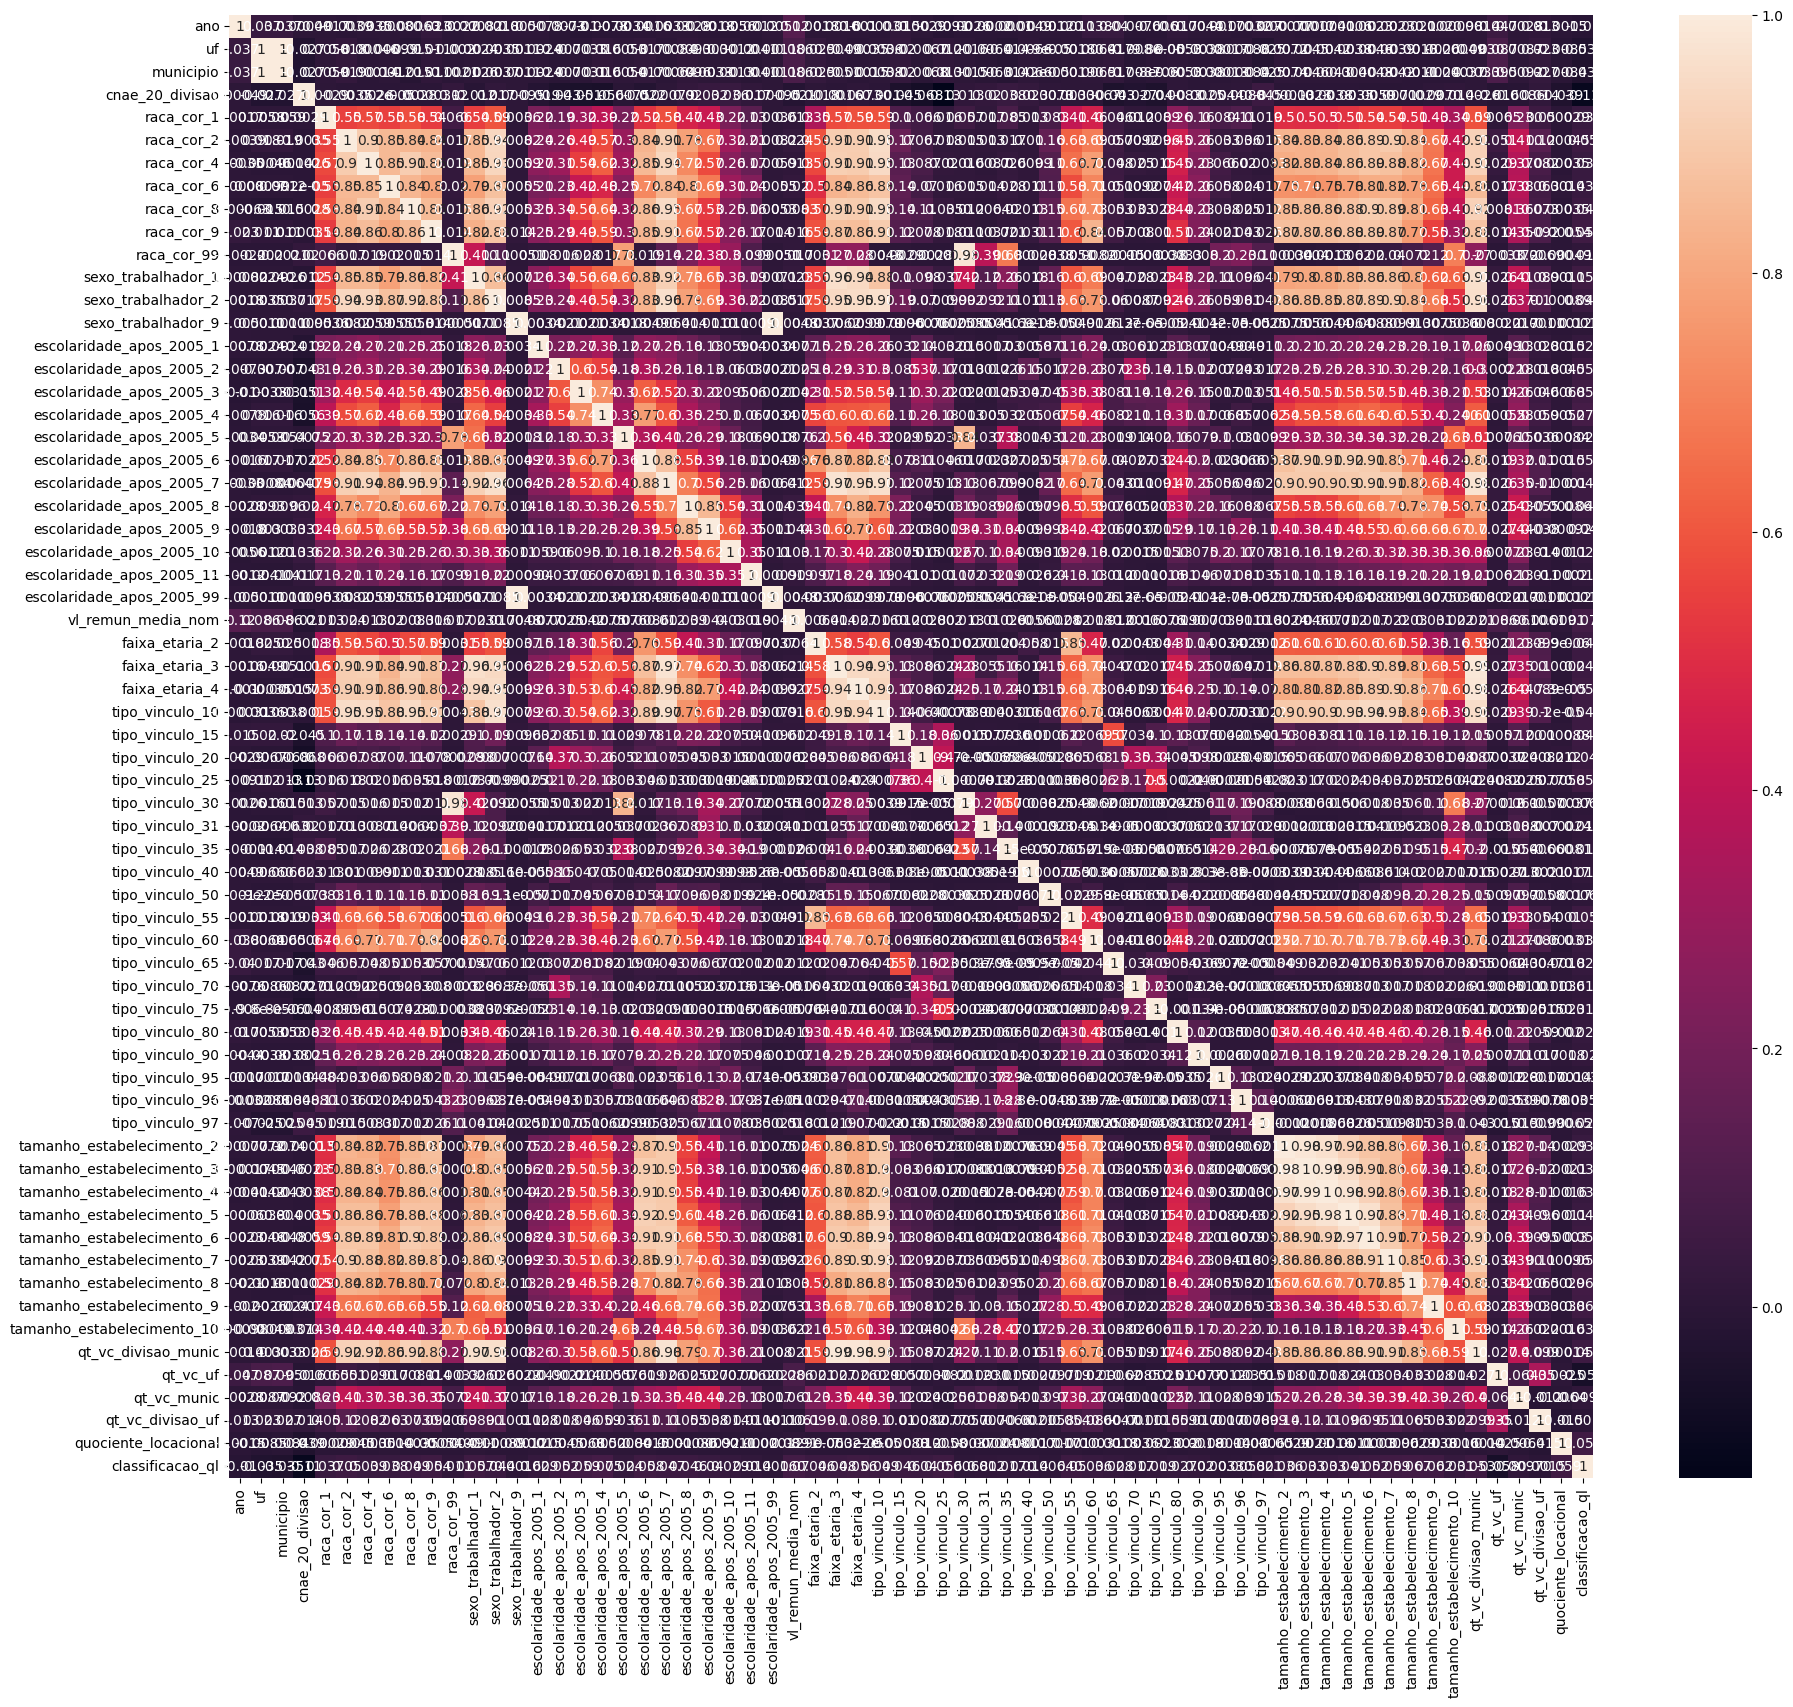

In [33]:
#encontrando a matriz de correlação entre alguns dados
plt.rcParams["figure.figsize"] = [22, 19]
matriz_correlacao=df_vinculos_final[df_columns].corr()
sns.heatmap(matriz_correlacao, annot=True)  #realiza o plot da matriz de correlação
plt.show()

In [34]:
df_vinculos_final.to_csv('dados_rais/dados_rais_jovens_ql.csv', index=False)

In [35]:
df_vinculos_ql.to_csv('dados_rais/dados_vinculos_ql.csv', index=False)